In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "SO2", "SO2_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      3453 non-null   datetime64[ns]
 1   SO2       2477 non-null   float64       
 2   SO2_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "SO2", "SO2_flag"]].describe()

,Time,SO2
count,3453,2477.000000
mean,2020-04-23 03:36:26.272806400,0.990740
min,2015-08-01 00:00:00,-1.813816
25%,2017-12-11 00:00:00,0.429083
50%,2020-04-22 00:00:00,0.757382
75%,2022-09-02 00:00:00,1.102632
max,2025-01-27 00:00:00,69.114637
std,NaN,2.344432


In [7]:
def clean(x):
    if x >= 0.5 and x <= 1000: return x
    return np.nan

In [8]:
dfDay["SO2"] = dfDay["SO2"].apply(clean)

In [9]:
dfDay["SO2"].describe()

count    1750.000000
mean        1.333110
std         2.709045
min         0.501597
25%         0.728788
50%         0.944955
75%         1.249159
max        69.114637
Name: SO2, dtype: float64

In [10]:
dfDay["SO2"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: SO2
Non-Null Count  Dtype  
--------------  -----  
1750 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [11]:
dfDay.loc[dfDay["SO2_flag"] != "OK", "SO2"] = np.nan

In [12]:
dfDay[dfDay["SO2_flag"] != "OK"]["SO2"].info()

<class 'pandas.core.series.Series'>
Index: 2884 entries, 0 to 3443
Series name: SO2
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 45.1 KB


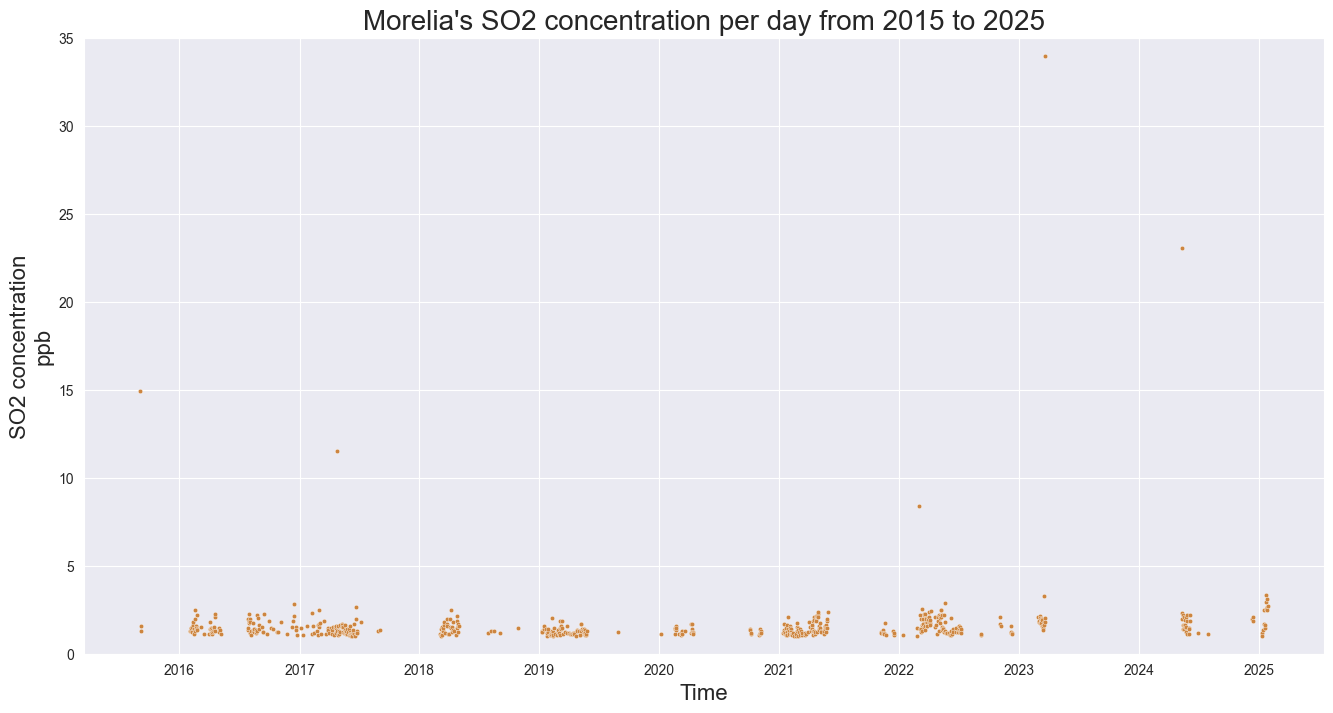

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["SO2"], s=10, color="peru")
plt.ylim(0, 35)
plt.ylabel("SO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's SO2 concentration per day from 2015 to 2025", size=20)
plt.show()

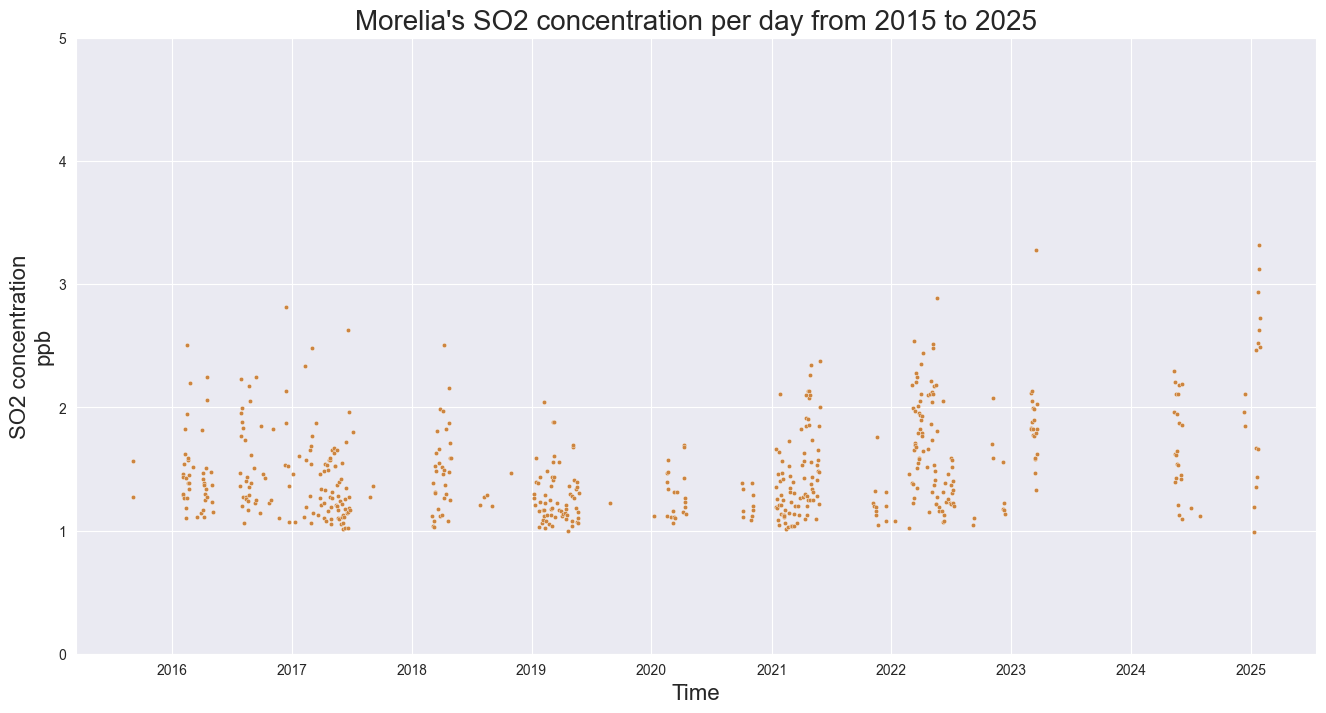

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["SO2"], s=10, color="peru")
plt.ylim(0, 5)
plt.ylabel("SO2 concentration\nppb", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's SO2 concentration per day from 2015 to 2025", size=20)
plt.show()